In [132]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

from sklearn.preprocessing import PowerTransformer

In [38]:
df = pd.read_csv('concrete_data.csv')

In [39]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [40]:
df.shape

(1030, 9)

In [41]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [42]:
# df.info()

In [43]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(25)

In [45]:
df[df.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
X = df.drop('Strength', axis=1)
y = df['Strength']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [50]:
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [51]:
regression = LinearRegression()
regression.fit(X_train_Scaled, y_train)

LinearRegression()

In [52]:
y1_predict = regression.predict(X_test_Scaled)

In [53]:
r2 = r2_score(y_test, y1_predict)
r2

0.5644991091885494

In [ ]:
# Using Cross Validation

In [68]:
linear = LinearRegression()
score = np.mean(cross_val_score(linear, X,y ,scoring='r2', cv=5))
score

np.float64(0.4768001056283902)

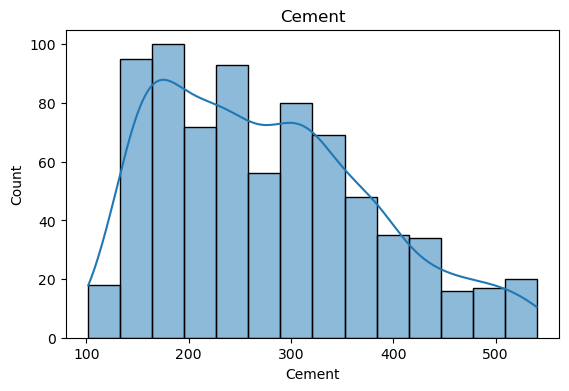

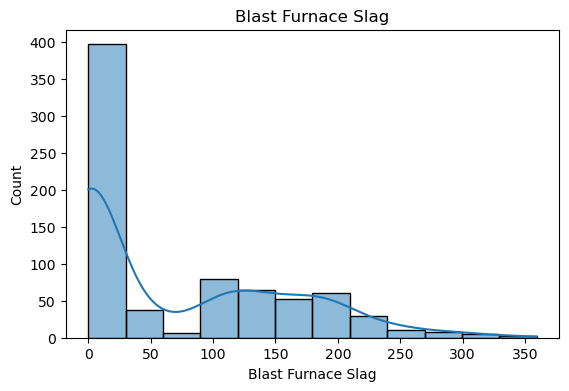

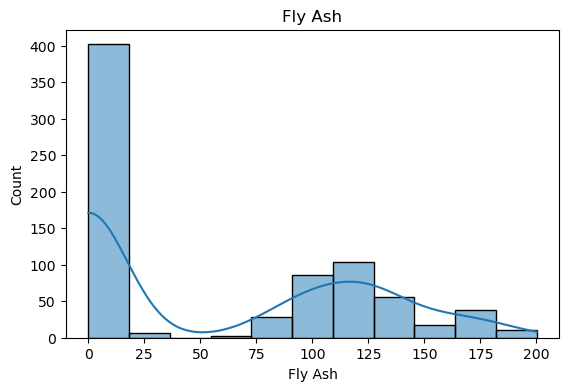

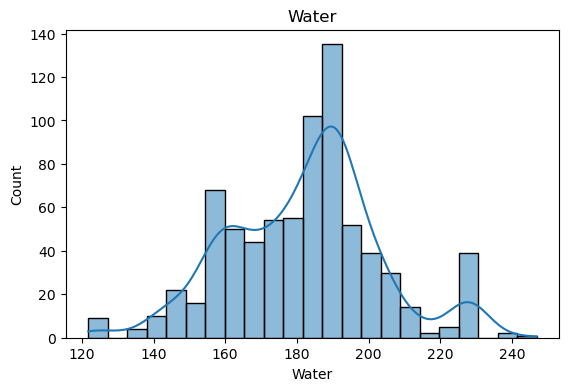

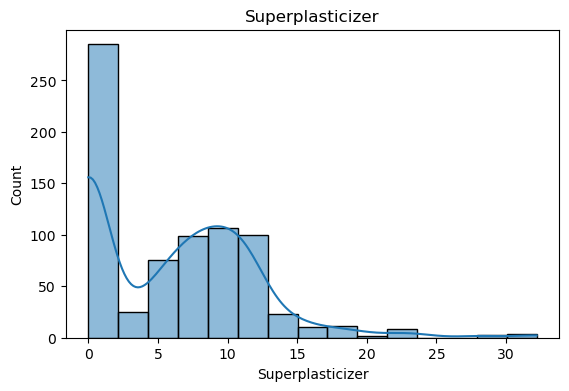

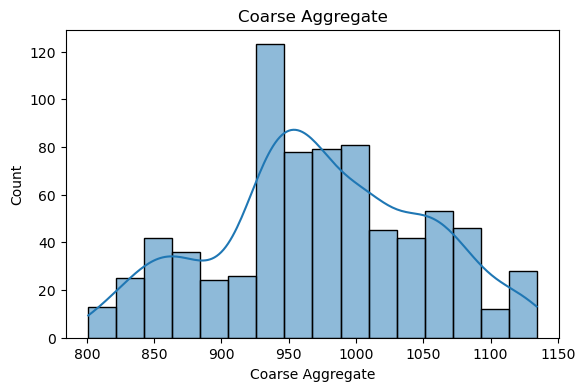

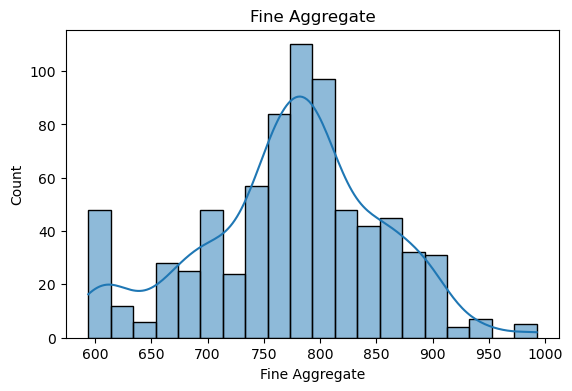

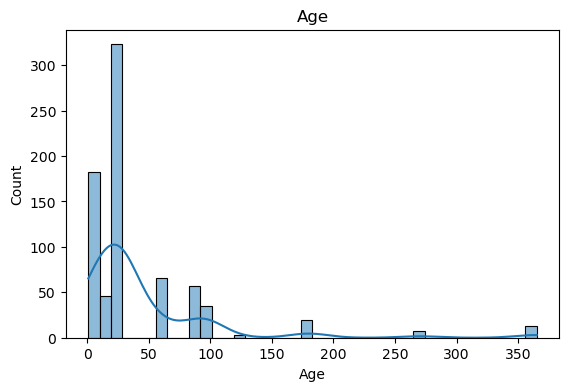

In [75]:
for col in X_train.columns: 
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)
    plt.show()

In [114]:
# Doing all of above Using Box-Cox Transformer 

In [86]:
p = PowerTransformer(method='box-cox')
X_train_transformed = p.fit_transform(X_train+0.000001)
X_test_transformed = p.transform(X_test+0.000001)

pd.DataFrame({'columns': X_train.columns, 'box-cox lambdas': p.lambdas_})

,columns,box-cox lambdas
0,Cement,0.079412
1,Blast Furnace Slag,0.024645
2,Fly Ash,-0.022125
3,Water,0.957134
4,Superplasticizer,0.096598
5,Coarse Aggregate,1.229991
6,Fine Aggregate,1.842530
7,Age,0.062731


In [89]:
linearModel = LinearRegression() 
linearModel.fit(X_train_transformed, y_train)

LinearRegression()

In [92]:
predict = linearModel.predict(X_test_transformed)
r2 = r2_score(y_test, predict)
r2

0.7808829510408707

In [103]:
# using cross validation 
linearModel1 = LinearRegression()
X_transformed = p.fit_transform(X+0.000001)
np.mean(cross_val_score(linearModel1, X_transformed,y, scoring='r2', cv=5))

np.float64(0.6761744108087082)

In [113]:
# Doing all of above Using Yeo-Johnson Transformer 

In [107]:
p1 = PowerTransformer('yeo-johnson')
X_train_transformed1 = p1.fit_transform(X_train)
X_test_transformed1 = p1.transform(X_test)

In [109]:
model = LinearRegression()
model.fit(X_train_transformed1, y_train)

LinearRegression()

In [111]:
predict2 = model.predict(X_test_transformed1)
r2_score(y_test,predict2)

0.7841045571649755

In [116]:
pd.DataFrame({'columns':X_train.columns, 'Yeo-Johnson Lambdas':p1.lambdas_})

,columns,Yeo-Johnson Lambdas
0,Cement,0.076309
1,Blast Furnace Slag,0.011302
2,Fly Ash,-0.095352
3,Water,0.956775
4,Superplasticizer,0.246852
5,Coarse Aggregate,1.230320
6,Fine Aggregate,1.843677
7,Age,0.016327


In [123]:
df.shape

(1005, 9)

In [130]:
X_transformed_df = pd.DataFrame(
      X_transformed, columns=[
          'Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer',
          'Coarse Aggregate','Fine Aggregate','Age'
      ]
)

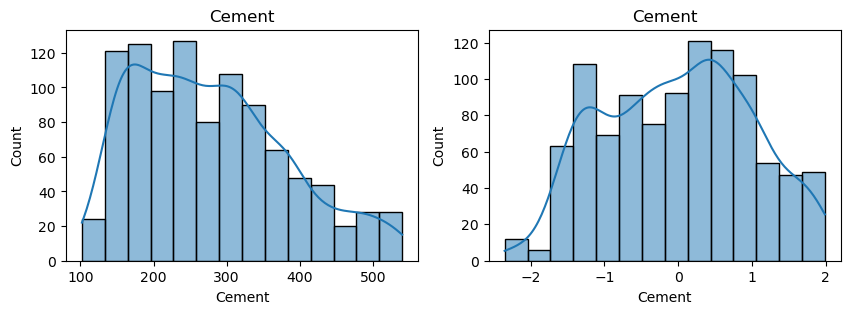

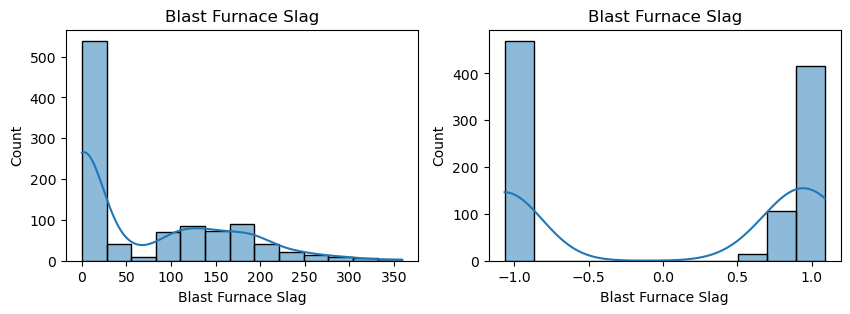

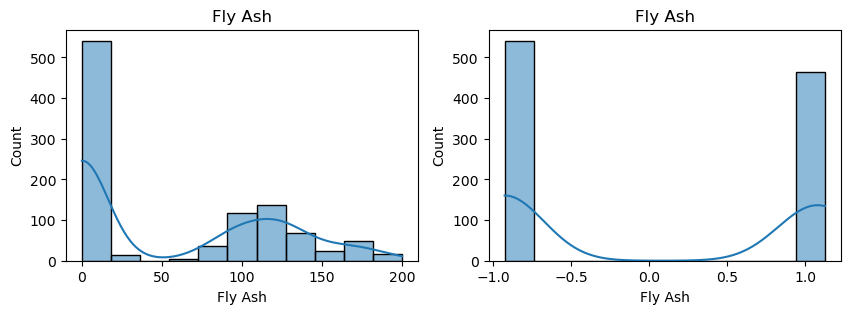

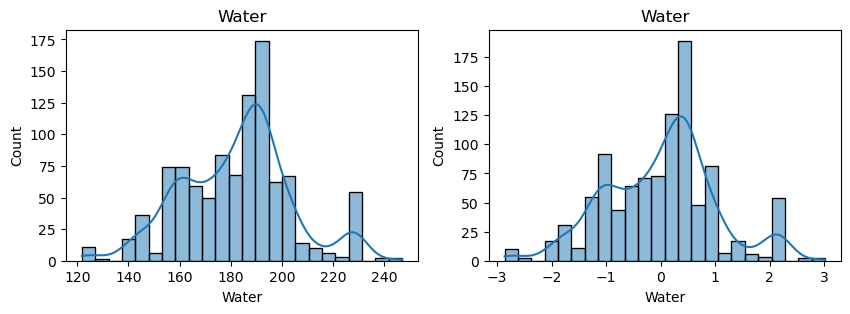

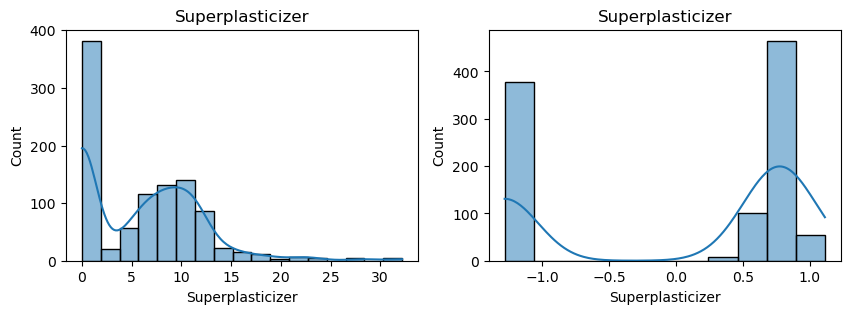

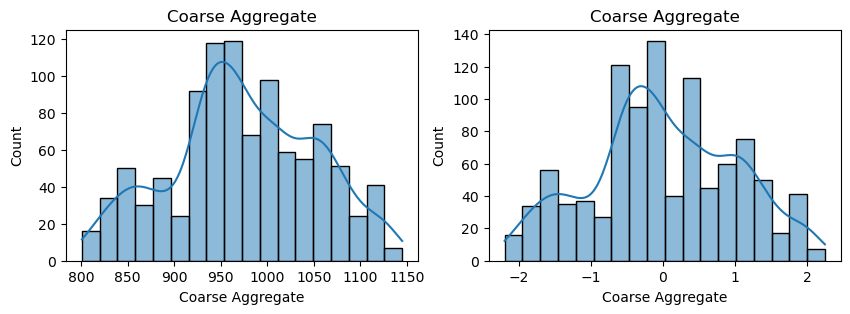

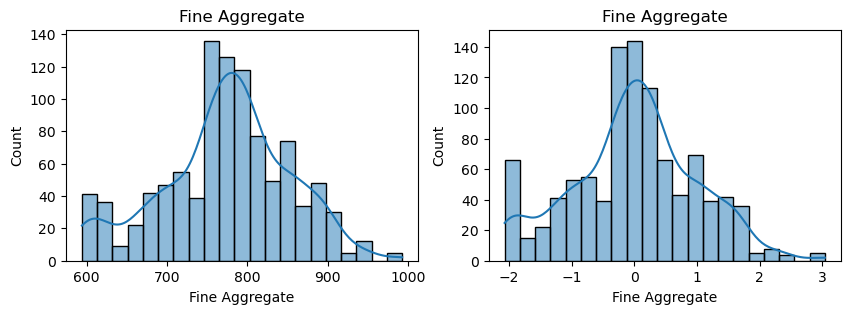

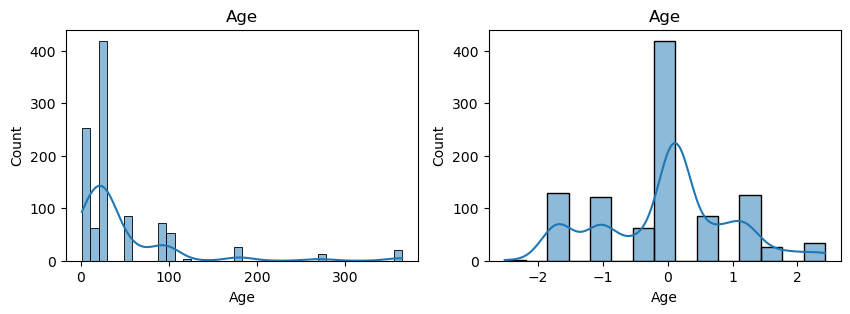

In [136]:
for col in X_transformed_df.columns:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1) 
    sns.histplot(X[col],kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    sns.histplot(X_transformed_df[col], kde=True)
    plt.title(col)

    plt.show()
    